# Satellite navigation disturbances in Finland

In [3]:
%pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 43.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


required on Codespaces for pd.read_html()

In [1]:
import pandas as pd

In [16]:
url='situational-picture-disturbances-satellite-navigation-finland-2024'
(pd
 .read_html('https://www.traficom.fi/en/news/'+url)
 [0]
 .to_csv('finland_disturbance.csv',index=False)
)

Save data locally to avoid webscraping everytime I rerun the notebook.

In [2]:
fi_data=pd.read_csv('finland_disturbance.csv',header=1)

In [3]:
fi_data

,Year,Finland,Finnish operators’ notifications outside of Finland
0,2018,0,6
1,2019,8,137
2,2020,27,34
3,2021,8,71
4,2022,65,1331
5,2023,239,7370
6,2024 (by 30 April),Around 1200,Around 2100


Unfortunately the last line is not purely numeric and needs some cleanup.

In [65]:
def clean_table(df):
    return df.assign(
        disturbance_year=fi_data
        .Year.str.split(' ',expand=True)[0],#.astype('int32'),
        end_date =fi_data
        .Year.str.split('by ',expand=True)[1].str.rstrip(')').fillna('31 December'),
        disturbances_Finland=fi_data
        .Finland.str.replace('Around ','').astype('int32'),
        disturbances_Outside=fi_data
        ['Finnish operators’ notifications outside of Finland']
        .str.replace('Around ','').astype('int32'),
        weighting_factors=pd.Series([1,1,1,1,1,1,3])
        )

array([<Axes: xlabel='disturbance_year'>,
       <Axes: xlabel='disturbance_year'>,
       <Axes: xlabel='disturbance_year'>], dtype=object)

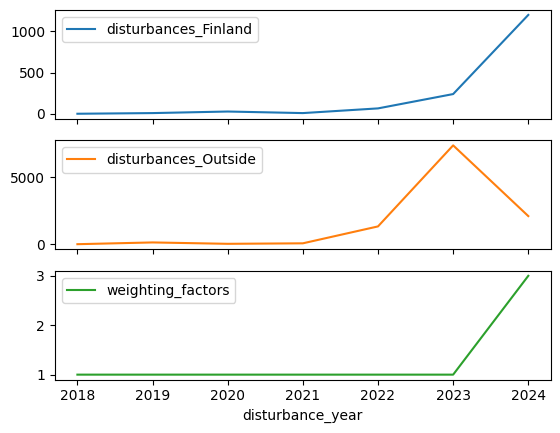

In [66]:
(fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 .plot(subplots=True)
)

In [67]:
(fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 .corr(numeric_only=True)
)

,disturbances_Finland,disturbances_Outside,weighting_factors
disturbances_Finland,1.000000,0.272785,0.981675
disturbances_Outside,0.272785,1.000000,0.085829
weighting_factors,0.981675,0.085829,1.000000


In [68]:
(fi_data
 .pipe(clean_table)
)

,Year,Finland,Finnish operators’ notifications outside of Finland,disturbance_year,end_date,disturbances_Finland,disturbances_Outside,weighting_factors
0,2018,0,6,2018,31 December,0,6,1
1,2019,8,137,2019,31 December,8,137,1
2,2020,27,34,2020,31 December,27,34,1
3,2021,8,71,2021,31 December,8,71,1
4,2022,65,1331,2022,31 December,65,1331,1
5,2023,239,7370,2023,31 December,239,7370,1
6,2024 (by 30 April),Around 1200,Around 2100,2024,30 April,1200,2100,3


<Axes: xlabel='disturbance_year'>

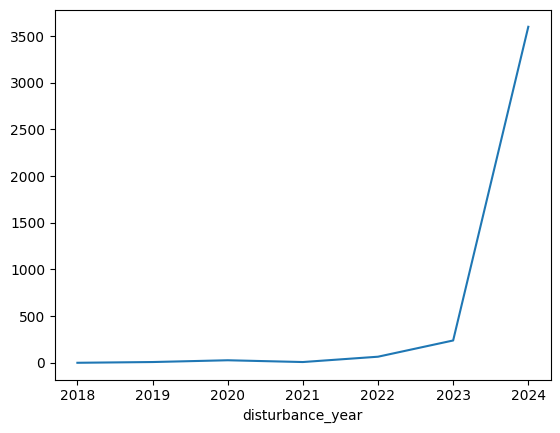

In [69]:
(fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 .disturbances_Finland * 
 fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 .weighting_factors
).plot()

<Axes: xlabel='disturbance_year'>

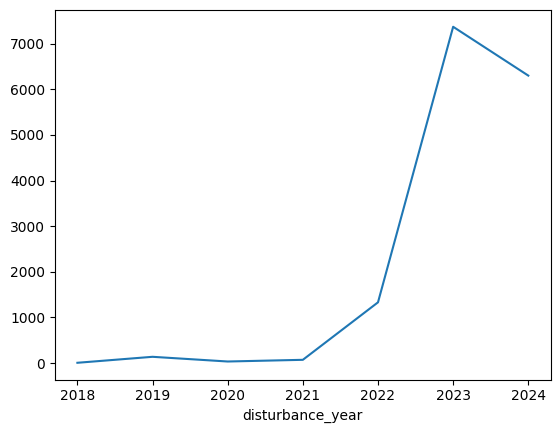

In [70]:
(fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 .disturbances_Outside * 
 fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 .weighting_factors
).plot()

In [72]:
(fi_data
 .pipe(clean_table)
 .end_date
 +' '+ fi_data
  .pipe(clean_table)
  .disturbance_year
)

0    31 December 2018
1    31 December 2019
2    31 December 2020
3    31 December 2021
4    31 December 2022
5    31 December 2023
6       30 April 2024
dtype: object